In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [19]:
class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

In [6]:
X = torch.arange(-3,3,0.1).view(-1,1)
f = -3 * X

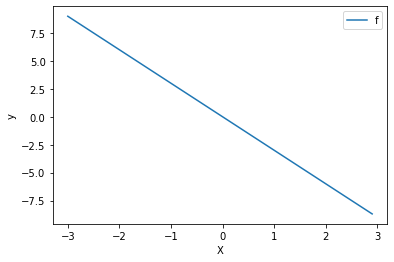

In [10]:
plt.plot(X.numpy(),f.numpy(),label='f')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [11]:
#add some noise to the data. Note this is Y
# we are trying to map X to this Y
Y = f + 0.1*torch.randn(X.size())


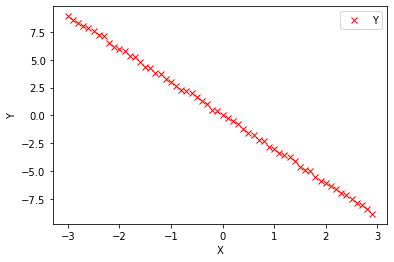

In [13]:
plt.plot(X.numpy(),Y.numpy(),'rx',label='Y')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [14]:
def forward(x):
    return w*x

In [15]:
def criterion(yhat,y):
    return torch.mean((yhat-y)**2)

In [16]:
lr = 0.1
LOSS = []

In [17]:
#set up the weight
w = torch.tensor(-10.0,requires_grad=True)

In [20]:
gradient_plot = plot_diagram(X,Y,w,stop=5)

In [21]:
#Define a function to train a model
def train_model(iter):
    for epoch in range(iter):
        Yhat = forward(X)
        loss = criterion(Yhat,Y)
        #note since loss is a function we need to grab item out of it
        gradient_plot(Yhat,w,loss.item(),epoch)
        
        #store the loss into list
        LOSS.append(loss.item())
        #compute gradient of loss with respect to all lernable parameters
        #in our case w is the only parameter. so it calculates d_loss/d_w
        #in other word, it calculates impact of 'w' on 'loss'
        loss.backward()
        
        #update the w
        w.data = w.data - lr * w.grad.data
        
        #zero the gradients before running the backward pass
        w.grad.data.zero_()
        
        

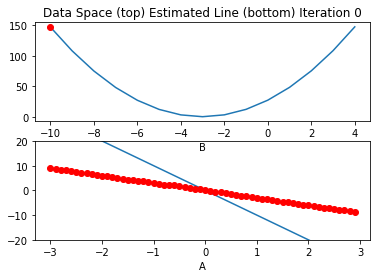

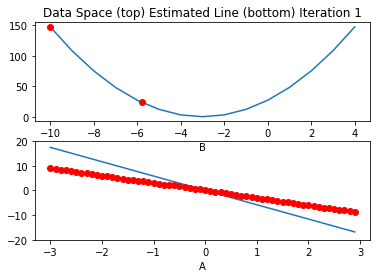

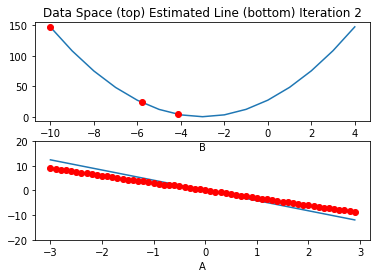

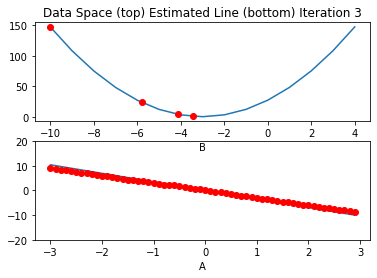

<Figure size 432x288 with 0 Axes>

In [22]:
train_model(4)

[146.89553833007812, 23.472126007080078, 3.757277488708496, 0.6081581115722656]


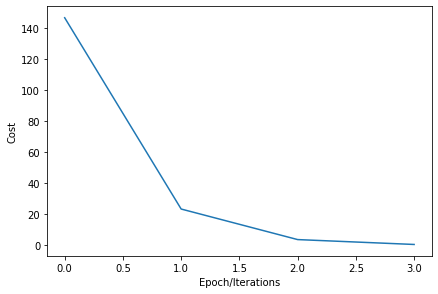

In [24]:
#plot the cost of each iteration
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")
print(LOSS)

In [59]:
w = torch.tensor(-15.0,requires_grad=True)
gradient_plot1 = plot_diagram(X,Y,w,stop=5)

In [60]:
LOSS2=[]

In [61]:
def my_train_model(iter):
    for epoch in range(iter):
        yhat = forward(X)
        loss = criterion(yhat,Y)
        gradient_plot(yhat,w,loss.item(),epoch)
        LOSS2.append(loss.item())
        
        loss.backward()
        w.data = w.data - w.grad.data*lr
        w.grad.data.zero_()

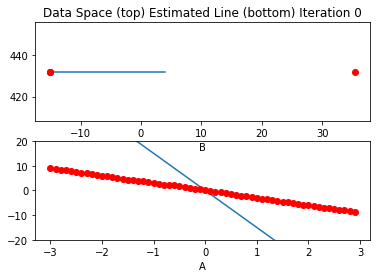

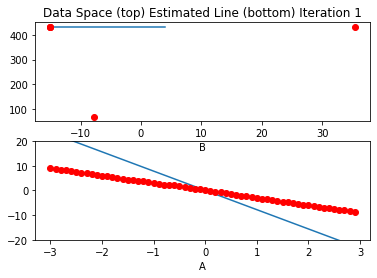

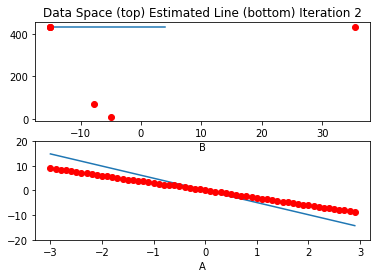

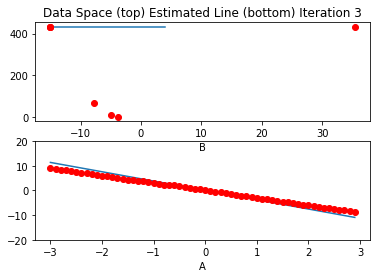

<Figure size 432x288 with 0 Axes>

In [62]:
my_train_model(4)

In [ ]:
plt.plot(LOSS,label='loss')
plt.plot(LOSS2,label='loss2')
plt.legend()